 __Census Income Data Set__

Abstract: Also known as the Adult Census Income data set, this data set from the 1994 and 1995 Current Population Surveys, was extracted by Ronny Kohavi and Barry Becker, from the U.S. Census Bureau database.  

It contains the extracted weighted census data, and has 41 employment and demographic related variables.

While the original table contained 199,523 rows and 42 columns, the newer refined versions of the data set contain anywhere between 14-16 columns and above 30,000 rows. It is a commonly cited data set of KNN(known nearest neighbors) and is a classification problem.

__Objective__: Predict whether income exceeds $50,000 per year.

In [1]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# Data Processing

In [2]:
#loading the dataset
df=pd.read_csv("adult.csv")

#lets see insights of the data sets
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.tail()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Inspecting the data

In [4]:
#checking the data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
#checking the column values
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#cheking the shape
df.shape

(32561, 15)

__Observation__

There are 15 columns and 32561 rows in this datas set

9 columns are object type and 6 columns are integer

some of the columns contains null values which are mentioned as '?'

# Summary statistics

In [8]:
df.describe(include="all")

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# data cleaning

In [9]:
df=df.replace('?', np.nan)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
df["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df["native.country"].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [14]:
#scince all the variables are object type we can replace it with mode
#lets fill the null values.since the feature is catagorical type lets fill it with mode
df["workclass"]= df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"]= df["occupation"].fillna(df["occupation"].mode()[0])
df["native.country"]= df["native.country"].fillna(df["native.country"].mode()[0])

# Exploratory data analysis

In [15]:
#lets replace target variable with 0 and 1 for easy computation

salary distribution 

 0    24720
1     7841
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

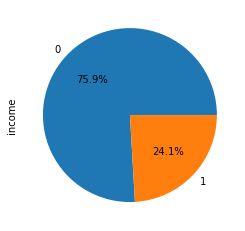

In [16]:
df['income'] = df['income'].str.replace('<=50K', '0')
df['income'] = df['income'].str.replace('>50K', '1')
df['income'] = df['income'].astype(np.int64)
print("salary distribution","\n\n",df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct="%.1f%%")

__people with >50K salary is only 24.1%__

work class distribution 

 Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            21
Name: workclass, dtype: int64


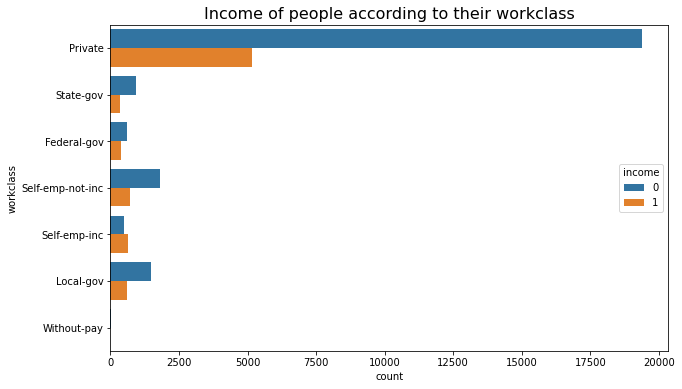

In [17]:
#analysis of work class and thier impact on income

df['workclass'] = df['workclass'].str.replace('Never-worked', 'Without-pay')
print("work class distribution","\n\n",df['workclass'].value_counts())
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = df['workclass'], hue = df['income'])
plt.show()

__Obseravation__

work class private is highest and number of people with salary more than 50k is also highest

Self Employed sector, the number of people whose income > 50K are more than the number of people whose income < 50K

occupation distribution 

 Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


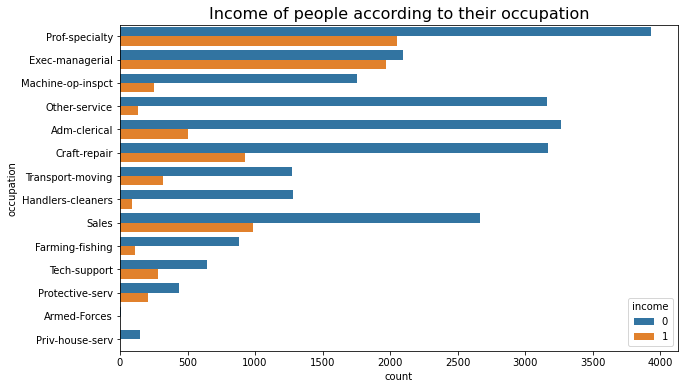

In [18]:
print("occupation distribution","\n\n",df['occupation'].value_counts())
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = df['occupation'], hue = df['income'])
plt.show()

Majority of people whose income is greater than 50K are either executive managers or they belong to any professional speciality.

In [19]:
occupation_enc = (df.groupby('occupation').size()) / len(df)
print(occupation_enc)

df['occupation_enc'] = df['occupation'].apply(lambda x : occupation_enc[x])
df['occupation_enc'].head(3)
df.drop(['occupation'], axis = 1, inplace = True)

occupation
Adm-clerical         0.115783
Armed-Forces         0.000276
Craft-repair         0.125887
Exec-managerial      0.124873
Farming-fishing      0.030527
Handlers-cleaners    0.042075
Machine-op-inspct    0.061485
Other-service        0.101195
Priv-house-serv      0.004576
Prof-specialty       0.183747
Protective-serv      0.019932
Sales                0.112097
Tech-support         0.028500
Transport-moving     0.049046
dtype: float64


In [20]:
#We are checking for the salary on people in USA and outside USA, so , we will convert all the values where country is not USA to 'non-usa'

usa        29753
non_usa     2808
Name: native.country, dtype: int64


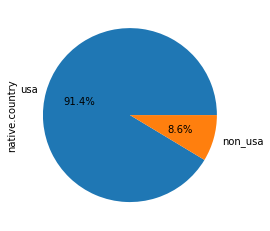

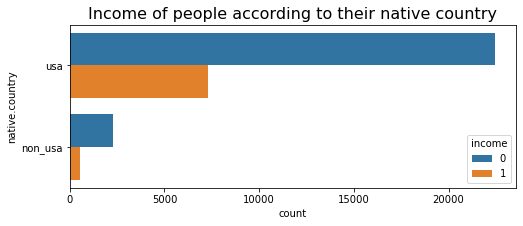

In [21]:
df['native.country'].loc[df['native.country'] == 'United-States'] = 'usa'
df['native.country'].loc[df['native.country'] != 'usa'] = 'non_usa'
print(df['native.country'].value_counts())
df['native.country'].value_counts().plot.pie(autopct="%.1f%%")
plt.figure(figsize = (8,3))
plt.title("Income of people according to their native country", fontsize = 16)
sns.countplot(y = df['native.country'], hue = df['income'])
plt.show()

only 8.6% of the people are non usa

Majority of people with higher income belong to the USA.

In [22]:
df['country_enc'] = df['native.country'].map({'usa' : 1, 'non_usa' : 0})
df.drop(['native.country'], axis = 1, inplace = True)

Number of males and females 

 Male      21790
Female    10771
Name: sex, dtype: int64


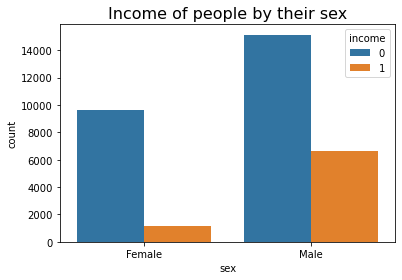

In [23]:
print("Number of males and females \n\n", df['sex'].value_counts())
plt.title("Income of people by their sex", fontsize = 16)
sns.countplot(x = df['sex'], hue = df['income'])
plt.show()

We can see that male have more salary than female

Distribution of martial status 

 Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


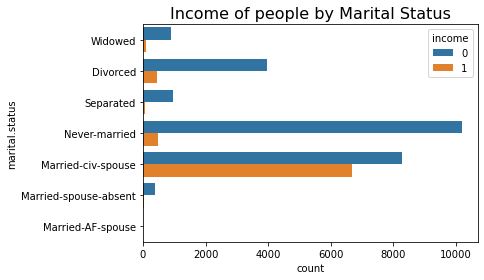

In [24]:
print("Distribution of martial status \n\n", df['marital.status'].value_counts())
plt.title("Income of people by Marital Status", fontsize = 16)
sns.countplot(y = df['marital.status'], hue = df['income'])
plt.show()


Married people have a higher income as compared to others

In [25]:
#encoding
marital_status_enc = (df.groupby('marital.status').size()) / len(df)
print(marital_status_enc)

df['marital.status'] = df['marital.status'].apply(lambda x : marital_status_enc[x])


marital.status
Divorced                 0.136452
Married-AF-spouse        0.000706
Married-civ-spouse       0.459937
Married-spouse-absent    0.012837
Never-married            0.328092
Separated                0.031479
Widowed                  0.030497
dtype: float64


Distribution of race

 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


Distribution of relationship

 Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


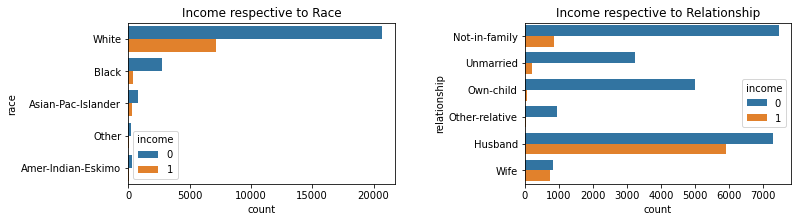

In [26]:
print("Distribution of race\n\n", df['race'].value_counts())


print("\n")
print("Distribution of relationship\n\n", df['relationship'].value_counts())


plt.figure(figsize = (12,4))

plt.subplot(1, 2, 1)
sns.countplot(y = df['race'], hue = df['income'])
plt.title("Income respective to Race", fontsize = 12)

plt.subplot(1, 2, 2)
sns.countplot(y = df['relationship'], hue = df['income'])
plt.title("Income respective to Relationship", fontsize = 12)

plt.tight_layout(pad = 4)
plt.show()

White people have a higher salary as compared to other races. Similarly, husband in the family have a higher salary as compared to other relationship in the family. 

In [27]:
race_enc = (df.groupby('race').size()) / len(df)
df['race'] = df['race'].apply(lambda x : race_enc[x])
relationship_enc = (df.groupby('relationship').size()) / len(df)
df['relationship'] = df['relationship'].apply(lambda x : relationship_enc[x])

In [28]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,occupation_enc,country_enc
0,90,Private,77053,HS-grad,9,0.030497,0.255060,0.854274,Female,0,4356,40,0,0.183747,1
1,82,Private,132870,HS-grad,9,0.030497,0.255060,0.854274,Female,0,4356,18,0,0.124873,1
2,66,Private,186061,Some-college,10,0.030497,0.105832,0.095943,Female,0,4356,40,0,0.183747,1
3,54,Private,140359,7th-8th,4,0.136452,0.105832,0.854274,Female,0,3900,40,0,0.061485,1
4,41,Private,264663,Some-college,10,0.031479,0.155646,0.854274,Female,0,3900,40,0,0.183747,1


In [29]:
#lets encode work class and sex and drop education
workclass_enc = (df.groupby('workclass').size()) / len(df)
df['workclass'] = df['workclass'].apply(lambda x : workclass_enc[x])
df['sex'] = df['sex'].map({'Male' : 1, 'Female' : 0})
df.drop(['education'], axis = 1, inplace = True)

age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
fnlwgt             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
education.num     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
marital.status    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
relationship         AxesSubplot(0.125,0.391471;0.133621x0.222059)
race              AxesSubplot(0.285345,0.391471;0.133621x0.222059)
sex                AxesSubplot(0.44569,0.391471;0.133621x0.222059)
capital.gain      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
capital.loss      AxesSubplot(0.766379,0.391471;0.133621x0.222059)
hours.per.week          AxesSubplot(0.125,0.125;0.133621x0.222059)
income               AxesSubplot(0.285345,0.125;0.133621x0.222059)
occupation_enc        AxesSubplot(0.44569,0.125;0.133621x0.222059)
country_enc          AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

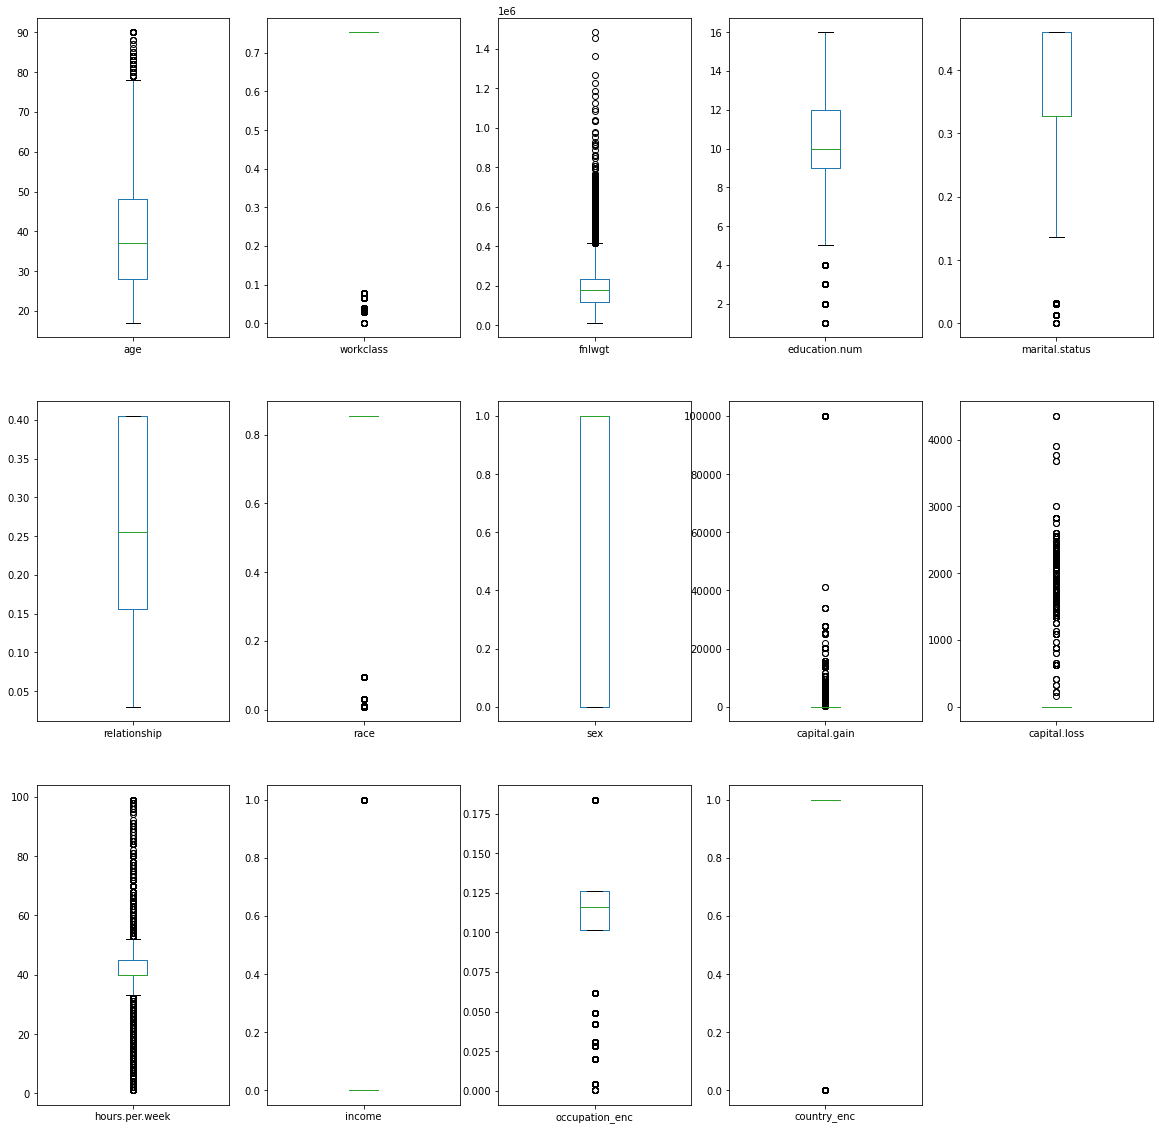

In [30]:
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(3,5),figsize=(20,20))

0.5587433694130483


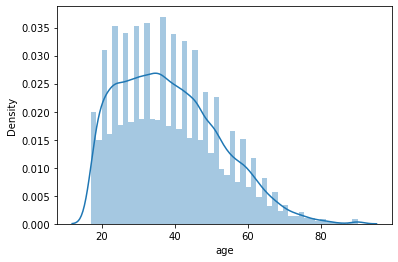

-1.179477296943412


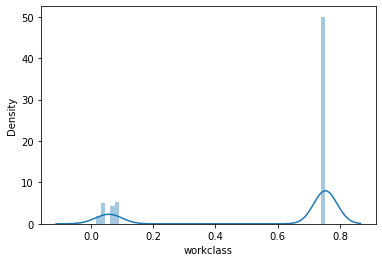

1.4469800945789828


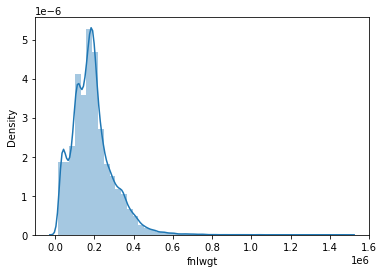

-0.31167586791022966


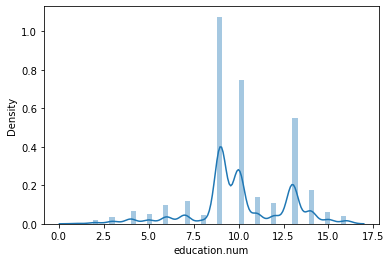

-0.9618105413850615


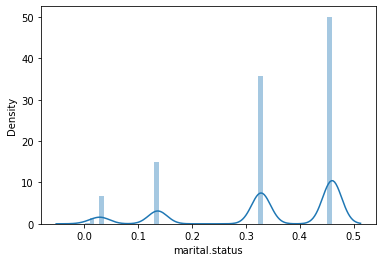

-0.25500688823469975


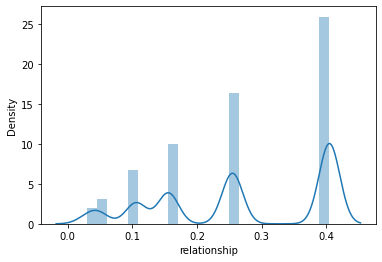

-2.0183245978451234


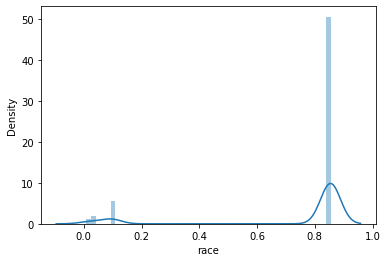

-0.7192925505964609


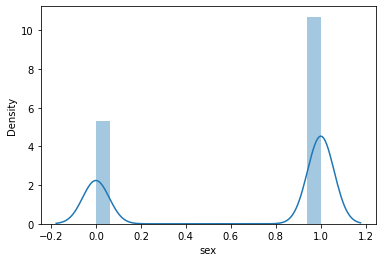

11.953847687699794


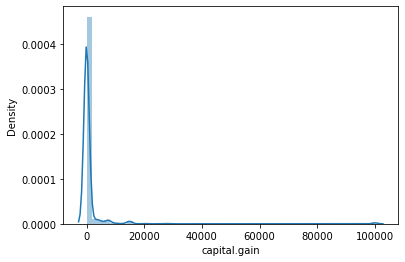

4.594629121679696


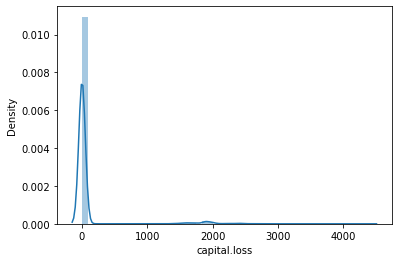

0.227642536804501


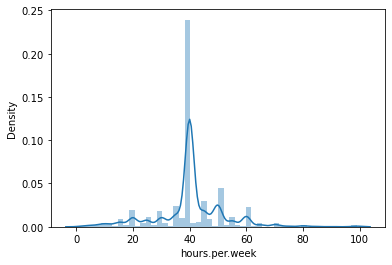

1.2124302420196833


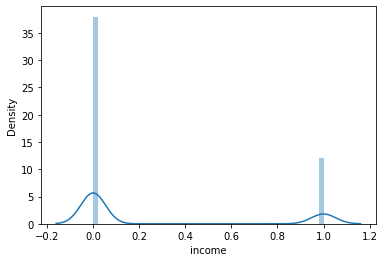

-0.1745628194643222


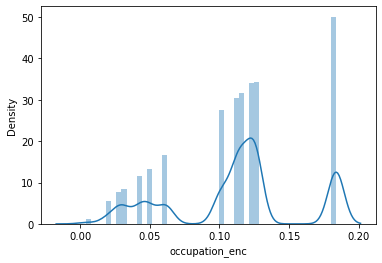

-2.9480460463113665


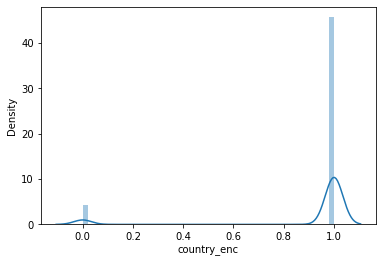

In [31]:
#Cheking skewness
for i in df.columns:
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

In [32]:
#Outliers and skewness is present in some of the columns we need to remove those

# Data cleaning and transformation

In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'occupation_enc', 'country_enc'],
      dtype='object')

In [34]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['workclass', 'education.num', 'marital.status',
       'relationship', 'race', 'sex',
       'income', 'occupation_enc', 'country_enc'] ,axis=1)))
z

(32561, 14)


array([[ 3.76961234,  1.06799736,  0.14592048, 10.59350656,  0.03542945],
       [ 3.18311167,  0.53916866,  0.14592048, 10.59350656,  1.81720429],
       [ 2.01011032,  0.03521956,  0.14592048, 10.59350656,  0.03542945],
       ...,
       [ 0.10398314,  0.33543266,  0.14592048,  0.21665953,  0.03542945],
       [ 1.42360965,  0.35877741,  0.14592048,  0.21665953,  0.03542945],
       [ 1.21564337,  0.11095988,  0.14592048,  0.21665953,  1.65522476]])

In [35]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((32561-30029)/32561)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(30029, 14)
using z score percentage of outlier removed: 7.776173950431497


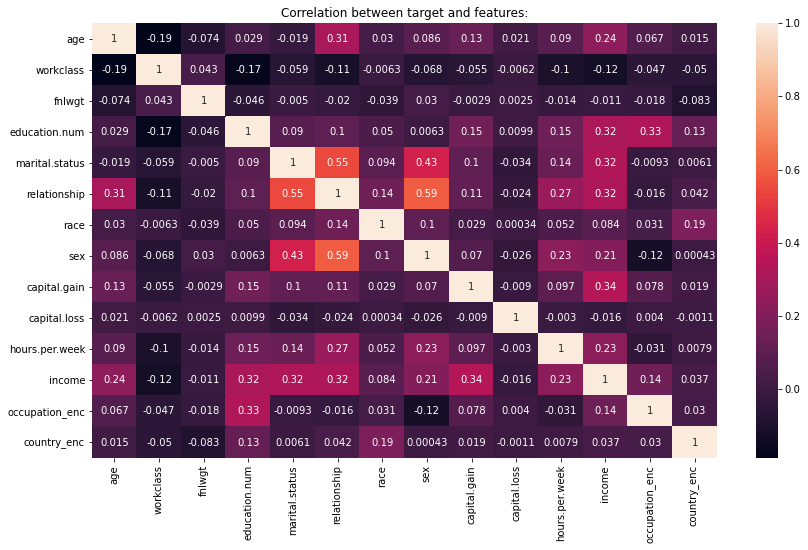

In [36]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(df_new.corr(), annot = True)
plt.show()

'Capital_gain', 'Education_num', 'Marital_status_enc', 'Relationship_enc' are most correlated to the Income of the observations.

In [37]:
#As we see that the values of attributes in the dataset vary largely, so it is important to scale the data. Using the Min-Max scaler in order to bring normalisation in the data.

In [38]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df_new.loc[:,'age':'hours.per.week'] = scale.fit_transform(df_new.loc[:,'age':'hours.per.week'])
df_new

,age,workclass,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,occupation_enc,country_enc
1470,0.725806,0.084533,0.298805,0.800000,1.000000,0.048067,1.0,0.0,0.0,1.00000,0.465753,0,0.115783,1
1471,0.887097,0.084533,0.267648,1.000000,1.000000,1.000000,1.0,1.0,0.0,1.00000,0.493151,0,0.124873,1
1472,0.951613,1.000000,0.429911,0.933333,1.000000,1.000000,1.0,1.0,0.0,1.00000,0.219178,0,0.183747,1
1473,0.790323,1.000000,0.684581,0.600000,1.000000,1.000000,1.0,1.0,0.0,1.00000,0.219178,0,0.049046,1
1474,0.258065,0.084533,0.505536,0.533333,0.295593,0.334671,1.0,0.0,0.0,0.90461,0.493151,0,0.115783,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.080645,1.000000,0.602916,0.600000,0.712900,0.599738,1.0,1.0,0.0,0.00000,0.493151,0,0.019932,1
32557,0.161290,1.000000,0.495942,0.733333,1.000000,0.048067,1.0,0.0,0.0,0.00000,0.465753,0,0.028500,1
32558,0.370968,1.000000,0.287604,0.533333,1.000000,1.000000,1.0,1.0,0.0,0.00000,0.493151,1,0.061485,1
32559,0.661290,1.000000,0.282617,0.533333,0.064870,0.201851,1.0,0.0,0.0,0.00000,0.493151,0,0.115783,1


In [39]:
!pip install delayed

In [41]:
from imblearn.combine import SMOTETomek
x=df_new.drop(labels="income",axis=1)
y=df_new["income"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)

# Model Building:

In [42]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import warnings

In [56]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        accuracyscore=accuracy_score(y_test,predict)
        if accuracyscore>max_score:
            max_score=accuracyscore
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [57]:
model_select(LogisticRegression)

Max score is 0.8102029985405333 with random state 64


In [58]:
model_select(GaussianNB)

Max score is 0.7819424174074565 with random state 101


In [59]:
model_select(KNeighborsClassifier)

Max score is 0.8669231789836805 with random state 94


In [60]:
model_select(DecisionTreeClassifier)

Max score is 0.8760780151253814 with random state 69


In [61]:
#lest use ensemble technique and see the accuracy
model_select(RandomForestClassifier)

Max score is 0.9130953960461722 with random state 78


In [64]:
model_select(GradientBoostingClassifier)

Max score is 0.8847684755207642 with random state 44


In [80]:
#random forest has given the best accuracy result lets proceed with that model

In [65]:
#lets train the best
x_train,x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.30, random_state=78)
print(x_train.shape, x_test.shape)

(31974, 13) (13704, 13)


In [67]:
cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()

0.9017013702496207

In [68]:
#CV score and acuracy are almost same we can proceed with best parameter search

In [69]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print("confusion matrix",confusion_matrix(y_test,pred_rf ))
print("\n")
print("classificationreport", classification_report(y_test,pred_rf))
print("accuracy score",accuracy_score(y_test,pred_rf))

confusion matrix [[6174  686]
 [ 496 6348]]


classificationreport               precision    recall  f1-score   support

           0       0.93      0.90      0.91      6860
           1       0.90      0.93      0.91      6844

    accuracy                           0.91     13704
   macro avg       0.91      0.91      0.91     13704
weighted avg       0.91      0.91      0.91     13704

accuracy score 0.9137478108581436


<AxesSubplot:>

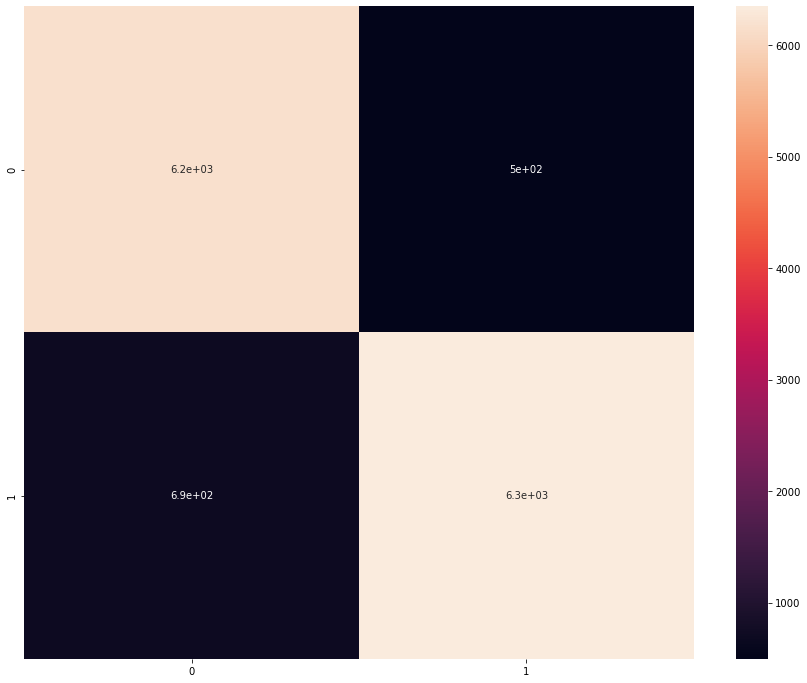

In [70]:
#confusion matrix in heat map
plt.figure(figsize=(15,12))
sns.heatmap(confusion_matrix(pred_rf, y_test), annot=True)

In [71]:
#area under curve and recevieng operating charecteristics

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [72]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [73]:
y_pred_prob

array([0.3 , 0.31, 0.99, ..., 0.  , 0.29, 1.  ])

In [74]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [75]:
print("False positive rate:", fpr)
print("\n")
print("True positive rate:", tpr)
print("\n")
print("Threshold values:", threshold)

False positive rate: [0.00000000e+00 2.91545190e-04 5.83090379e-04 5.83090379e-04
 1.16618076e-03 1.31195335e-03 2.33236152e-03 3.35276968e-03
 4.22740525e-03 4.95626822e-03 5.24781341e-03 6.55976676e-03
 7.58017493e-03 8.74635569e-03 9.91253644e-03 1.16618076e-02
 1.28279883e-02 1.48688047e-02 1.60349854e-02 1.73469388e-02
 1.83673469e-02 1.98250729e-02 2.11370262e-02 2.36151603e-02
 2.41982507e-02 2.53644315e-02 2.68221574e-02 2.95918367e-02
 3.13411079e-02 3.35276968e-02 3.79008746e-02 4.00874636e-02
 4.24198251e-02 4.43148688e-02 4.73760933e-02 5.05830904e-02
 5.39358601e-02 5.64139942e-02 5.96209913e-02 6.28279883e-02
 6.50145773e-02 6.79300292e-02 7.14285714e-02 7.41982507e-02
 7.75510204e-02 8.16326531e-02 8.51311953e-02 9.02332362e-02
 9.46064140e-02 1.00000000e-01 1.02332362e-01 1.05830904e-01
 1.09475219e-01 1.14431487e-01 1.19679300e-01 1.24781341e-01
 1.29737609e-01 1.34693878e-01 1.39358601e-01 1.43586006e-01
 1.50874636e-01 1.54810496e-01 1.59329446e-01 1.64577259e-01
 1.

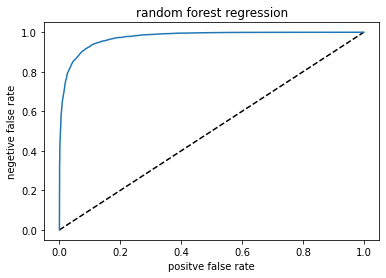

In [78]:
#AUC roc curve graphical representation
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr)
plt.xlabel("positve false rate")
plt.ylabel("negetive false rate")
plt.title("random forest regression")
plt.show()

In [77]:
#acu_score 
acu_score=roc_auc_score(y_test,y_pred_prob)
acu_score

0.9742494330119122

In [81]:
#saving thye model

In [79]:
import pickle
filename="Census income data set.pkl"
pickle.dump(rf,open(filename,"wb"))